# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date

In [2]:
df = pd.read_csv('dataset_SCL.csv', encoding = 'Latin-1', low_memory=False)

# Data Preparation

## Dataset review

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÃO       68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Looking for NaN values

In [5]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÃO         0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

It seems there is one row with nan value in Vlo-O column lets take a look at that row

In [6]:
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÃO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


We can delete it.

In [7]:
df.dropna(inplace=True)

## Changing column names to easier names

In [8]:
df.rename(columns={'Fecha-I':'sch_fl_time', 'Vlo-I':'sch_fl_no', 'Ori-I':'pr_ori_city_c', 'Des-I':'pr_des_city_c', 'Emp-I':'sch_fl_airline_c', 'Fecha-O':'op_fl_time', 'Vlo-O':'op_fl_no', 'Ori-O':'op_ori_city_c', 'Des-O':'op_des_city_c', 'Emp-O':'op_fl_airline_c', 'DIA':'fl_op_day_in_m', 'MES': 'fl_op_mo', 'AÃO':'fl_op_yr', 'DIANOM':'fl_op_day_in_w', 'TIPOVUELO':'fl_type', 'OPERA':'op_airline', 'SIGLAORI':'ori_city', 'SIGLADES':'des_city'}, inplace=True)

In [9]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
df.columns

Index(['sch_fl_time', 'sch_fl_no', 'pr_ori_city_c', 'pr_des_city_c',
       'sch_fl_airline_c', 'op_fl_time', 'op_fl_no', 'op_ori_city_c',
       'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo',
       'fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'op_airline', 'ori_city',
       'des_city'],
      dtype='object')

## Reformatting columns with datetime objects

In [11]:
# I know the flight day, month, year, and flight day in week were already provided, but I was more confident to do this change of format to the columns of time
df['sch_fl_time'] = pd.to_datetime(df['sch_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
df['op_fl_time'] = pd.to_datetime(df['op_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

## Sorting the dataset based on the scheduled flight time

In [12]:
df.sort_values(by='sch_fl_time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,1,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,1,1,2017,Domingo,I,Grupo LATAM,Santiago,Bogota
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,1,1,2017,Domingo,I,Avianca,Santiago,Bogota
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama


## Making a new column with the calculated flight delay time

A new column named as delay_time is added to the end of the dataset, it contains the differences between the operated flight time (op_fl_time) and scheduled flight time (sch_fl_time) for each flight

In [14]:
fl_delay_time = df['op_fl_time'].sub(df['sch_fl_time']).dt.total_seconds()
# df = df.assign(delay_time_s = fl_delay_time)
df = df.assign(delay_time_m = fl_delay_time/60)

In [15]:
df.head(5)

,sch_fl_time,sch_fl_no,pr_ori_city_c,pr_des_city_c,sch_fl_airline_c,op_fl_time,op_fl_no,op_ori_city_c,op_des_city_c,op_fl_airline_c,fl_op_day_in_m,fl_op_mo,fl_op_yr,fl_op_day_in_w,fl_type,op_airline,ori_city,des_city,delay_time_m
0,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,1,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,-11.0
1,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,1,1,2017,Domingo,I,Grupo LATAM,Santiago,Bogota,-5.0
2,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama,6.0
3,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,1,1,2017,Domingo,I,Avianca,Santiago,Bogota,5.0
4,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama,-2.0


It seems some flights had early departure

# 1_1. How the data is distributed?

# 1_2. Descriptive statistics, noteworthy insights to share

We can use describe() method to see descriptive statistics

In [16]:
perc=[.1, .5, .9]
df_describe = df.describe(percentiles=perc)
df_describe

,fl_op_day_in_m,fl_op_mo,fl_op_yr,delay_time_m
count,68205.000000,68205.000000,68205.000000,68205.000000
mean,15.714742,6.622667,2017.000029,9.110945
std,8.782941,3.523281,0.005415,19.313514
min,1.000000,1.000000,2017.000000,-14.000000
10%,4.000000,2.000000,2017.000000,-4.000000
50%,16.000000,7.000000,2017.000000,4.000000
90%,28.000000,11.000000,2017.000000,26.000000
max,31.000000,12.000000,2018.000000,161.000000


As we can see most of (90%) of the flights were done till 28th of each month, and most were on 11th month of 2017 with delay time of at least 26 minutes, we also had some flights departed at earlier time than scheduled, on average there were 9 minutes delay time, but according to the standard deviation of 19 minutes, most of them had departed 10 minutes early up to 28 minutes of delay. Only a few of them less than about 5% had departed earlier than 10 minutes and less than about 5% had long delay time of about 2 to 2.5 hours. Generally looking, LATAM airlines in 2017 and 2018 was managed considerably great according to the schedule.

for more information we can visualize the descriptive analysis below

## Plotting describe() function for numerical values

In [17]:
num_col = df._get_numeric_data().columns #numerical columns
cat_col = list(set(df.columns)-set(num_col)) # categorical columns

In [18]:
df_num_describe = df.describe(percentiles=perc, include=['int64', 'float64'])  # just to consider those columns with numeric values
df_num_describe.reset_index(inplace=True)

In [19]:
df_num_describe = df_num_describe[df_num_describe['index'] != 'count']

In [20]:
df_num_describe

,index,fl_op_day_in_m,fl_op_mo,fl_op_yr,delay_time_m
1,mean,15.714742,6.622667,2017.000029,9.110945
2,std,8.782941,3.523281,0.005415,19.313514
3,min,1.000000,1.000000,2017.000000,-14.000000
4,10%,4.000000,2.000000,2017.000000,-4.000000
5,50%,16.000000,7.000000,2017.000000,4.000000
6,90%,28.000000,11.000000,2017.000000,26.000000
7,max,31.000000,12.000000,2018.000000,161.000000


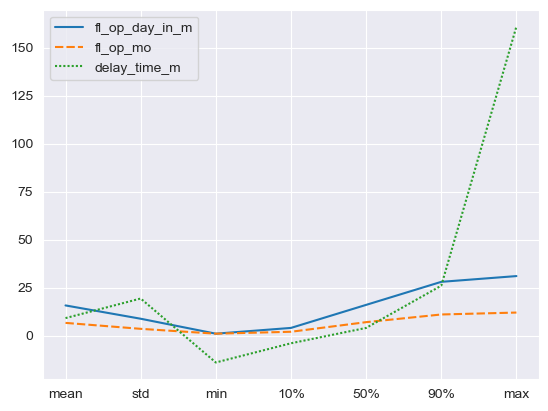

In [59]:
df_describe_temp = df_num_describe.drop(columns=['fl_op_yr'])
ax = sns.lineplot(data=df_describe_temp)
ax.set_xticks(range(1, 8))
ax.set_xticklabels(df_describe_temp['index'].values)
plt.show()

## Plotting value_counts() for categorical variables